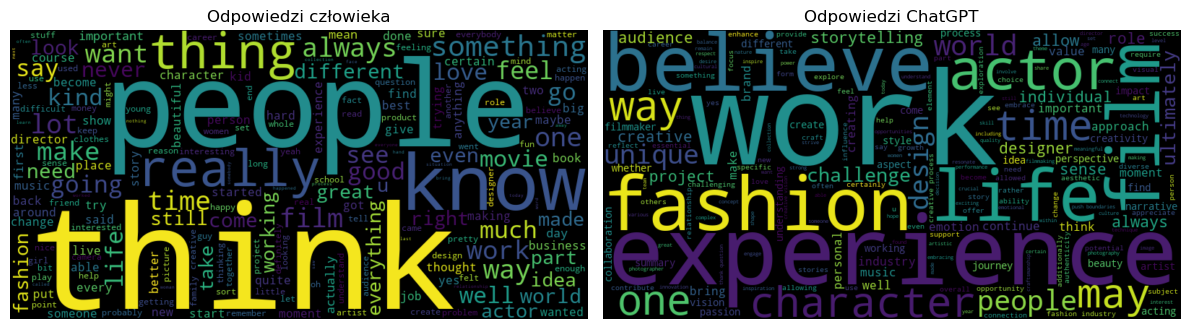

In [2]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt


df = pd.read_csv('cleaned_data_final.csv')

# Creating a word cloud
text_column1 = 'Human_response'
text1 = ' '.join(df[text_column1].dropna().tolist())  # Concatenating text from a column into a single string
wordcloud1 = WordCloud(width=800, height=400).generate(text1)


text_column2 = 'ChatGPT_3_5_response'
text2 = ' '.join(df[text_column2].dropna().tolist())  # Concatenating text from a column into a single string
wordcloud2 = WordCloud(width=800, height=400).generate(text2)


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis('off')
plt.title('Odpowiedzi człowieka')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis('off')
plt.title('Odpowiedzi ChatGPT')

plt.tight_layout()
plt.show()



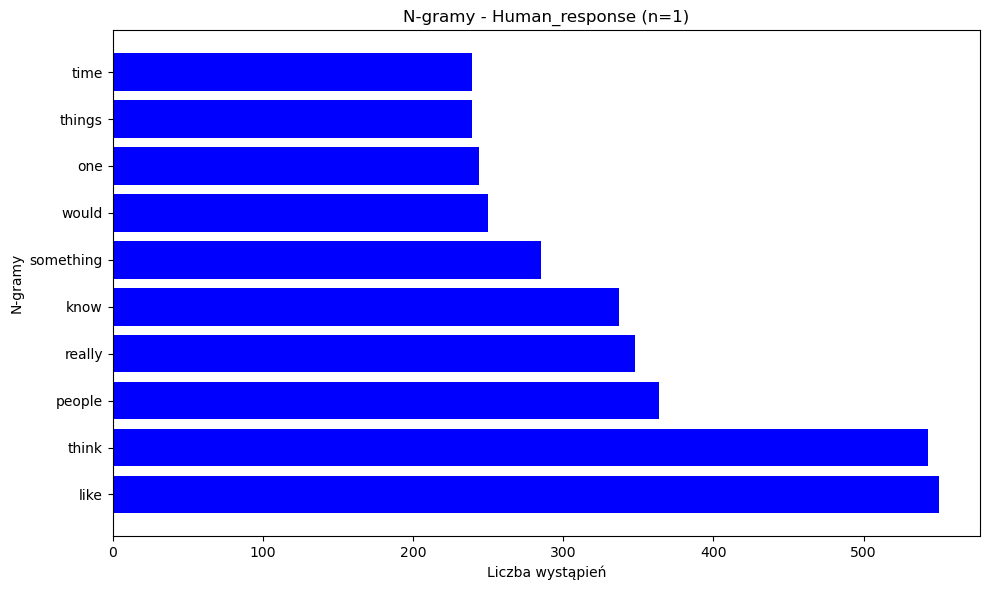

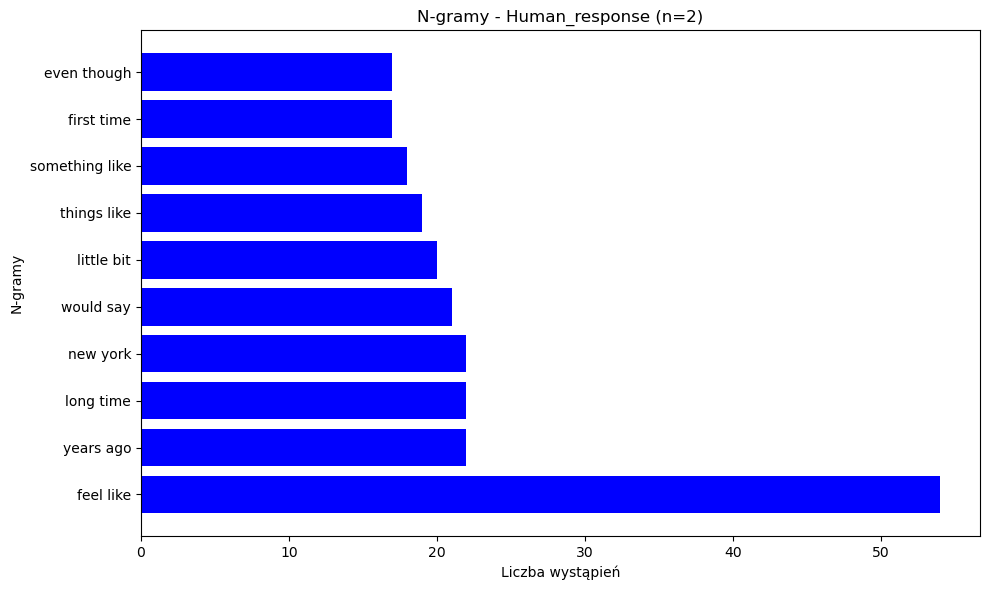

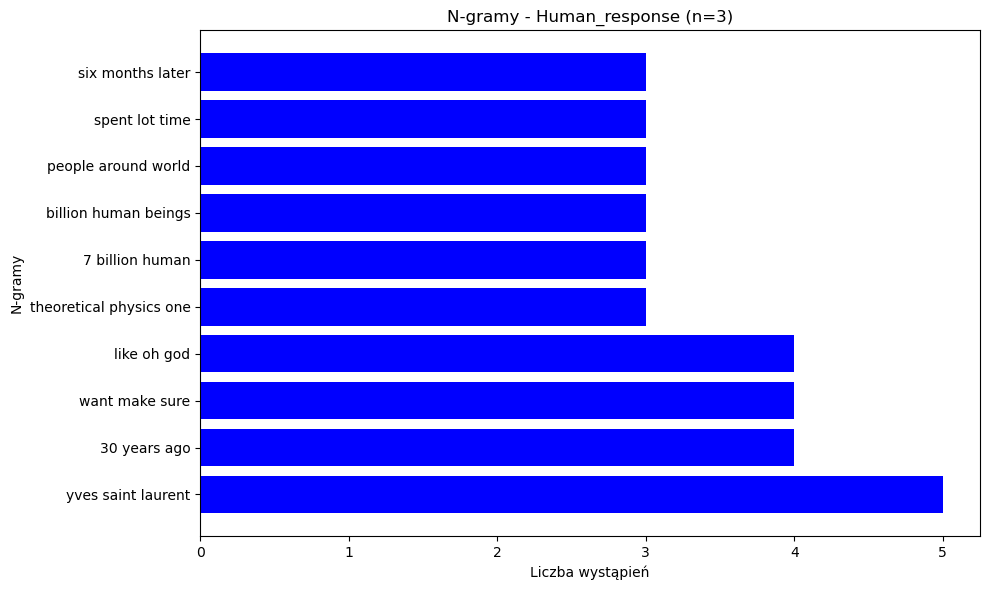

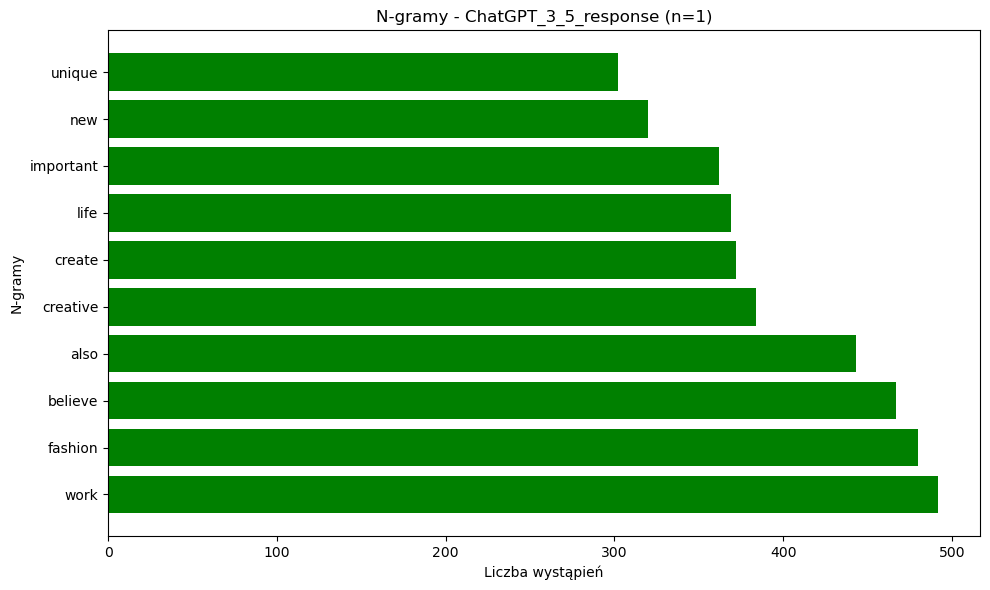

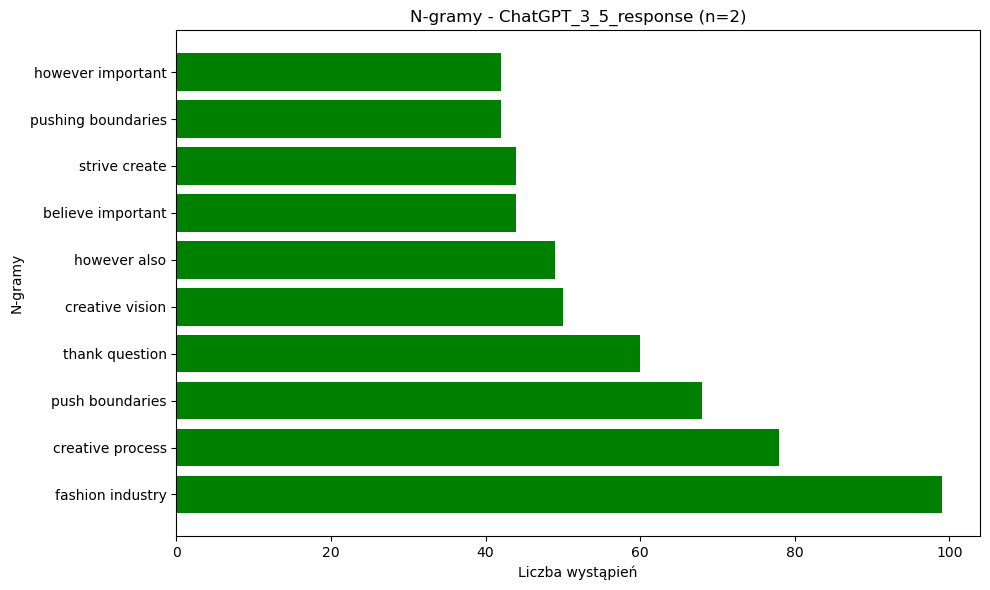

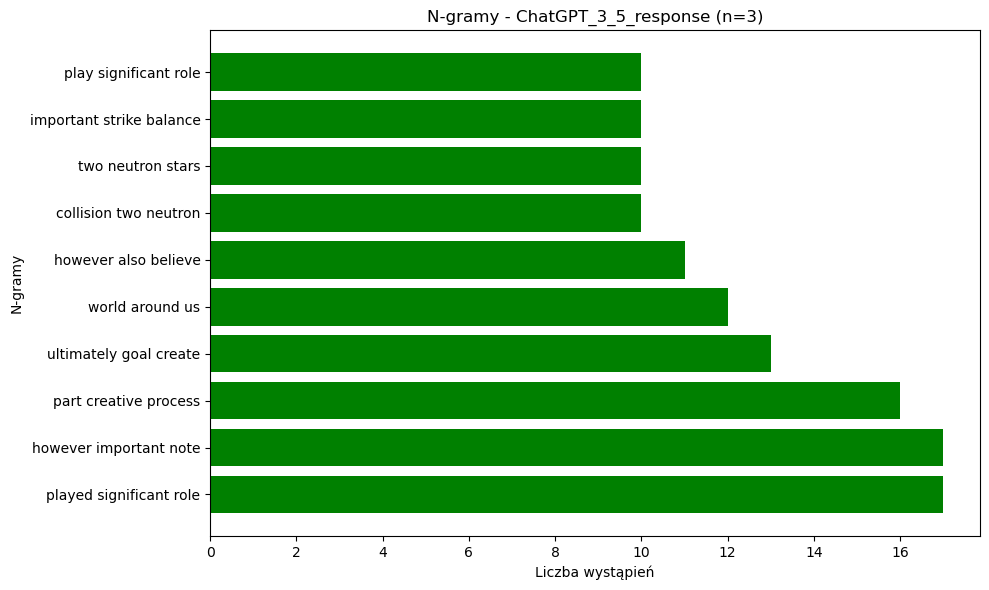

In [9]:
import pandas as pd
from nltk import ngrams
import matplotlib.pyplot as plt


df = pd.read_csv('cleaned_data_final.csv')

n_values = [1, 2, 3]


text_column1 = 'Human_response'
text1 = ' '.join(df[text_column1].dropna().tolist())  # Concatenating text from a column into a single string

for n in n_values:
    n_grams = ngrams(text1.split(), n)
    n_gram_freq = dict()
    for gram in n_grams:
        if gram in n_gram_freq:
            n_gram_freq[gram] += 1
        else:
            n_gram_freq[gram] = 1

    sorted_freq = sorted(n_gram_freq.items(), key=lambda x: x[1], reverse=True)
    top_n_grams = sorted_freq[:10]

    n_gram_labels = [' '.join(gram) for gram, freq in top_n_grams]
    n_gram_values = [freq for gram, freq in top_n_grams]

    plt.figure(figsize=(10, 6))
    plt.barh(n_gram_labels, n_gram_values, color='blue')
    plt.title(f'N-gramy - Human_response (n={n})')
    plt.xlabel('Liczba wystąpień')
    plt.ylabel('N-gramy')
    plt.tight_layout()
    plt.show()


text_column2 = 'ChatGPT_3_5_response'
text2 = ' '.join(df[text_column2].dropna().tolist())  # Concatenating text from a column into a single string

for n in n_values:
    n_grams = ngrams(text2.split(), n)
    n_gram_freq = dict()
    for gram in n_grams:
        if gram in n_gram_freq:
            n_gram_freq[gram] += 1
        else:
            n_gram_freq[gram] = 1

    sorted_freq = sorted(n_gram_freq.items(), key=lambda x: x[1], reverse=True)
    top_n_grams = sorted_freq[:10]  # Top 10 most frequent n-grams for the chart

    n_gram_labels = [' '.join(gram) for gram, freq in top_n_grams]
    n_gram_values = [freq for gram, freq in top_n_grams]

    plt.figure(figsize=(10, 6))
    plt.barh(n_gram_labels, n_gram_values, color='green')
    plt.title(f'N-gramy - ChatGPT_3_5_response (n={n})')
    plt.xlabel('Liczba wystąpień')
    plt.ylabel('N-gramy')
    plt.tight_layout()
    plt.show()




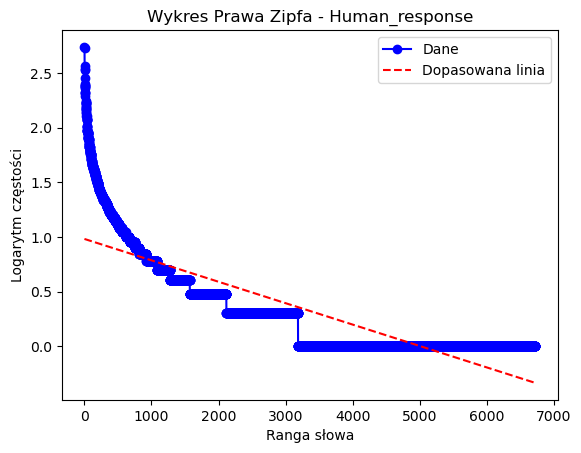

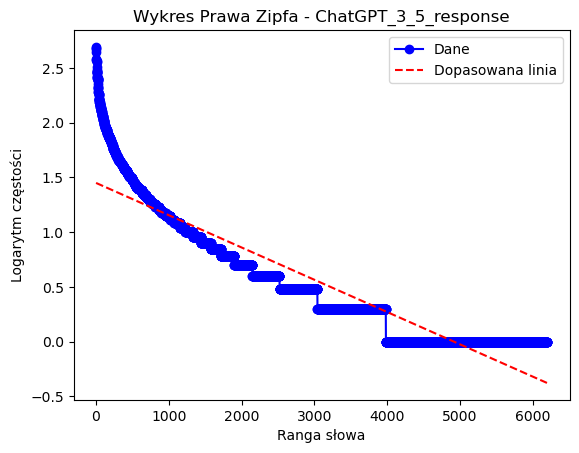

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from collections import Counter
from scipy.stats import linregress


df = pd.read_csv('cleaned_data_final.csv')


def generate_zipf_plot(column_name):

    text = ' '.join(df[column_name].dropna().tolist())  # Concatenating text from a column into a single string

    # Calculating the frequency of word occurrences
    word_counts = Counter(text.split())

    # Sorting words by frequency
    sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

    # Generating a Zipf's Law chart
    word_ranks = list(range(1, len(sorted_words) + 1))
    word_frequencies = [count for word, count in sorted_words]
    log_frequencies = [math.log10(freq) for freq in word_frequencies]

    plt.plot(word_ranks, log_frequencies, marker='o', linestyle='-', color='b')

    # Performing linear regression
    slope, intercept, _, _, _ = linregress(word_ranks, log_frequencies)

    # Displaying the fitted line
    fitted_line = [slope * rank + intercept for rank in word_ranks]
    plt.plot(word_ranks, fitted_line, linestyle='--', color='r')

    plt.xlabel('Ranga słowa')
    plt.ylabel('Logarytm częstości')
    plt.title('Wykres Prawa Zipfa - ' + column_name)
    plt.legend(['Dane', 'Dopasowana linia'])
    plt.show()


column1_name = 'Human_response'
column2_name = 'ChatGPT_3_5_response'

generate_zipf_plot(column1_name)
generate_zipf_plot(column2_name)



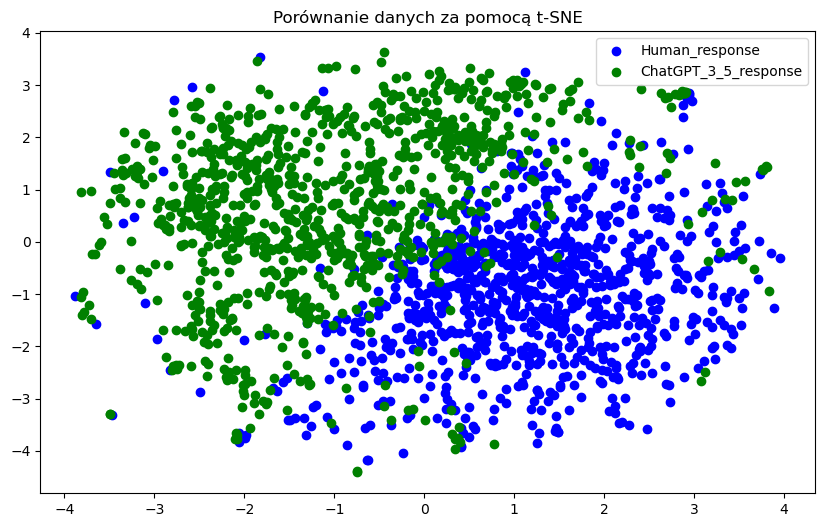

In [10]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


df = pd.read_csv('cleaned_data_final.csv')


column1 = 'Human_response'
column2 = 'ChatGPT_3_5_response'


data = df[column1].tolist() + df[column2].tolist()


vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(data)

# Dimensionality reduction using t-SNE
tsne = TSNE(n_components=2, random_state=42, init="random")
tsne_results = tsne.fit_transform(tfidf_matrix.toarray())

# Splitting the results into data from column 1 and column 2
tsne_column1 = tsne_results[:len(df)]
tsne_column2 = tsne_results[len(df):]


plt.figure(figsize=(10, 6))
plt.scatter(tsne_column1[:, 0], tsne_column1[:, 1], color='blue', label=column1)
plt.scatter(tsne_column2[:, 0], tsne_column2[:, 1], color='green', label=column2)
plt.title('Porównanie danych za pomocą t-SNE')
plt.legend()
plt.show()

